In [22]:
%pylab inline
import numpy as np
import cmath
import matplotlib.pyplot as plt;
from scipy.stats import moment
import mpmath
mpmath.dps = 50

Populating the interactive namespace from numpy and matplotlib


Statistical analisys of reflection coefficient in differrent cases

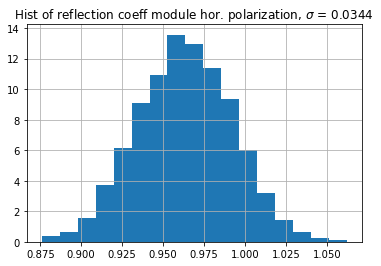

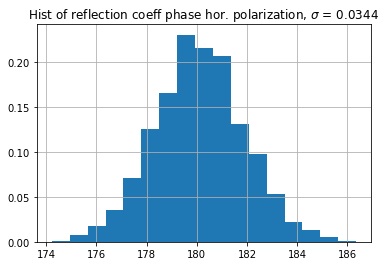

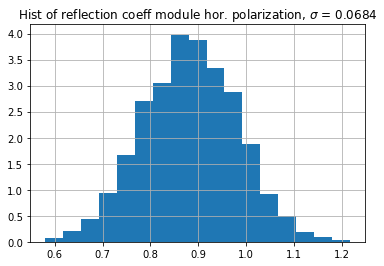

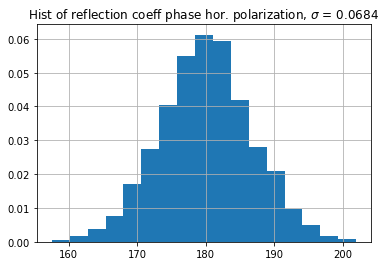

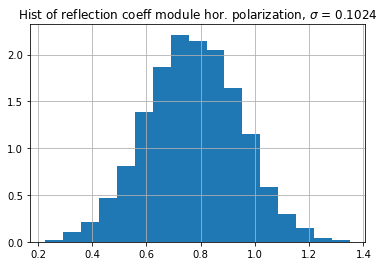

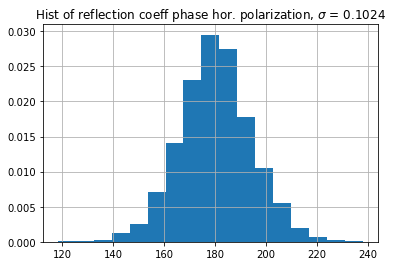

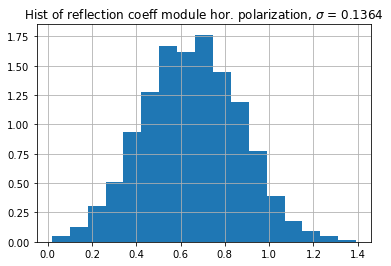

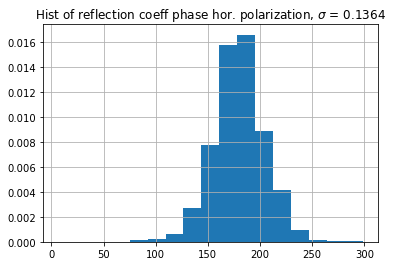

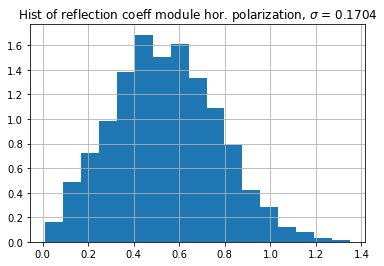

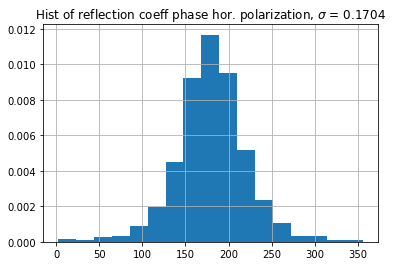

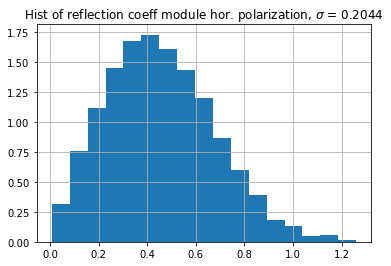

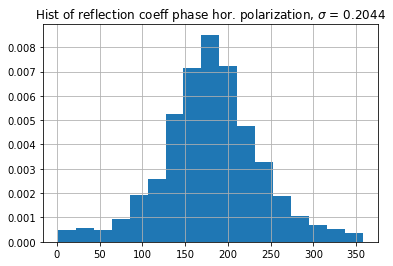

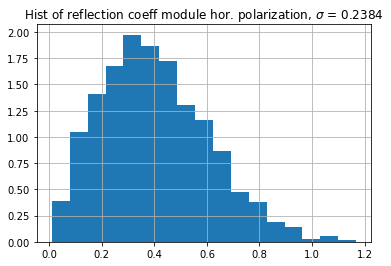

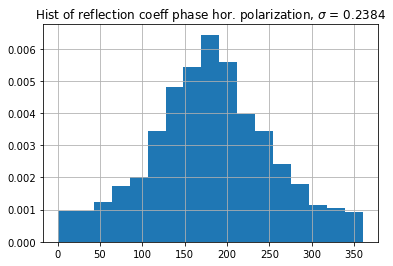

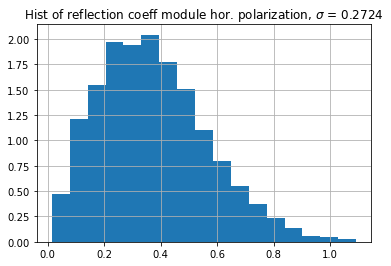

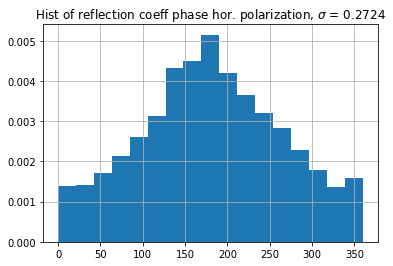

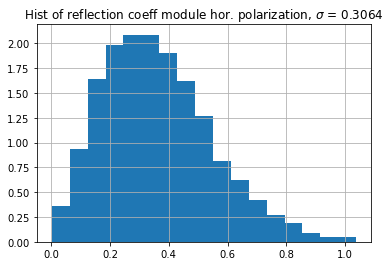

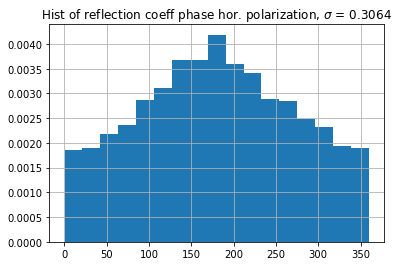

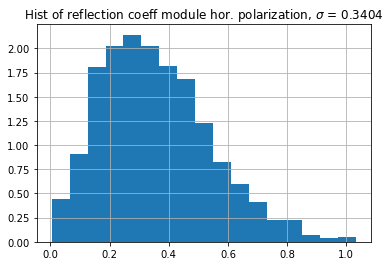

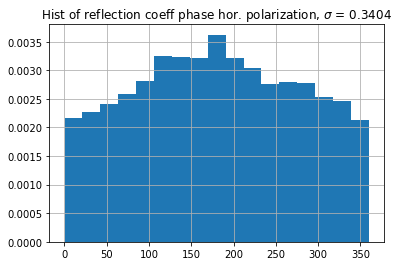

In [31]:
eps1 = 2.3
tanTH1 = 0.0015
eps2 = 55
tanTH2 = 0.54
tetha = 1
tetha = tetha*np.pi/180
lambd = 0.03
epsC1 = complex(eps1,eps1*tanTH1)
epsC2 = complex(eps2,eps2*tanTH2)
sko = np.arange(0.0344,0.35,0.034)
alf = np.around(sko*sin(tetha)/lambd, decimals = 2)
#horizontal
G1=sqrt(epsC1)*sin(tetha)-sqrt(epsC2-epsC1*(cos(tetha))**2)
G2=sqrt(epsC1)*sin(tetha)+sqrt(epsC2-epsC1*(cos(tetha))**2)
G = G1/G2
ksi=0.4*(1-np.exp(-276*(alf**2)))
aG=G*np.exp(-8*(np.pi**2)*(alf**2))
xk=np.real(aG)
yk=np.imag(aG)                              
N = 3000
ran = np.random.normal(0,1,(2,N))
#stats output matrix
mxh = np.zeros(len(alf))#mean
varx = np.zeros(len(alf))#var
m3 = np.zeros(len(alf))#3 moment
m4 = np.zeros(len(alf))#4 moment
#phase
mxf = np.zeros(len(alf))
varxf = np.zeros(len(alf))
m3f = np.zeros(len(alf))
m4f= np.zeros(len(alf))
for i in range(len(ksi)):
    eps=(ksi[i]/sqrt(2))*(ran)
    epsx=eps[0,:]
    epsy=eps[1,:]                               
    x=xk[i]+epsx
    y=yk[i]+epsy
    Gko=x+1j*y
    Gm=np.abs(Gko)
    phaseG=np.angle(Gko)+2*np.pi
    phaseG=mod(phaseG,2*np.pi)
    #stat for abs
    mxh[i]=np.mean(Gm)
    varx[i]=np.var(Gm)
    m3[i]=moment(Gm,3)
    m4[i]=moment(Gm,4)
    #for angle
    mxf[i]=np.mean(phaseG)
    varxf[i]=np.var(phaseG)
    m3f[i]=moment(phaseG,3)
    m4f[i]=moment(phaseG,4)                              
    fig = plt.figure()#abs
    count, bins, ignored = plt.hist(Gm, 17, density=True)
    plt.grid(True)
    plt.title(f'Hist of reflection coeff module hor. polarization, $\sigma$ = {sko[i]:.4f}')
    fig = plt.figure()#phase
    count, bins, ignored = plt.hist(phaseG*180/np.pi, 17, density=True)
    plt.grid(True)
    plt.title(f'Hist of reflection coeff phase hor. polarization, $\sigma$ = {sko[i]:.4f}')
                          
                               
                               
                               
                               

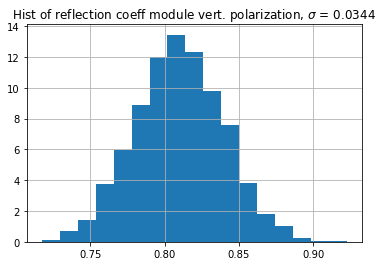

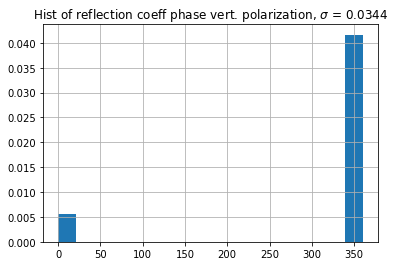

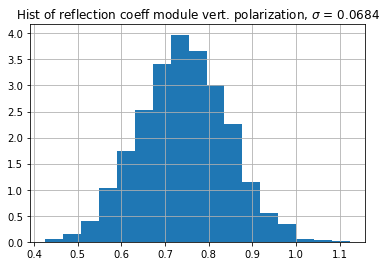

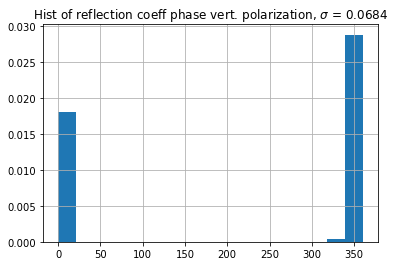

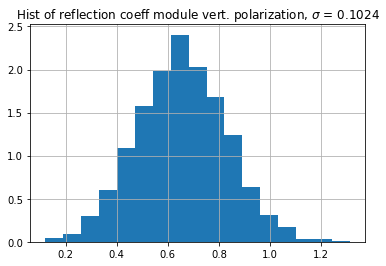

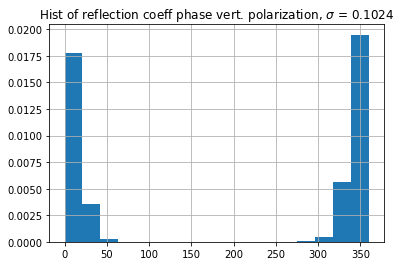

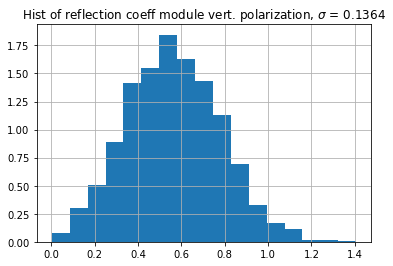

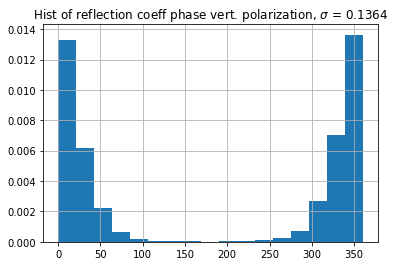

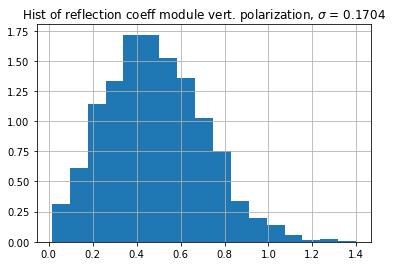

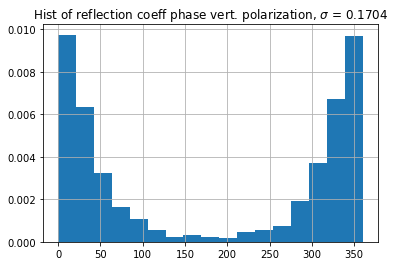

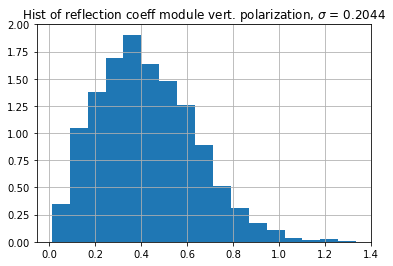

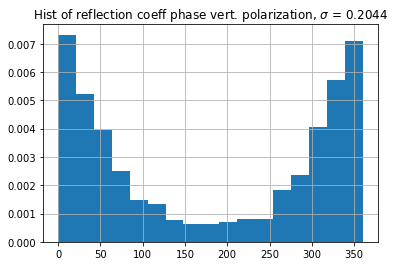

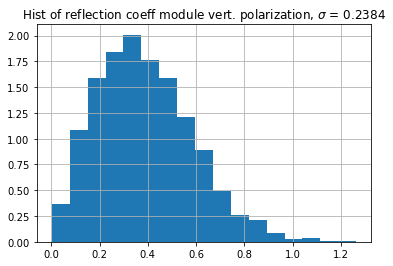

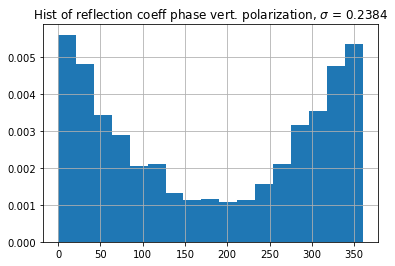

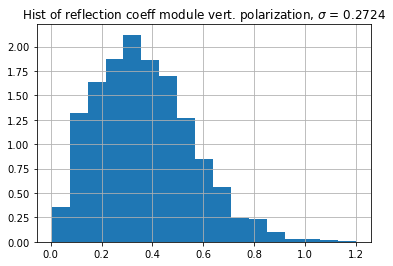

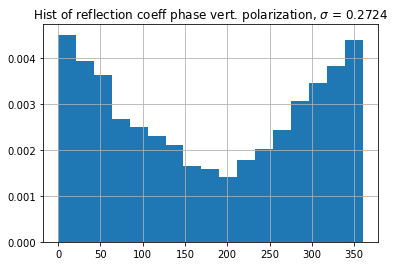

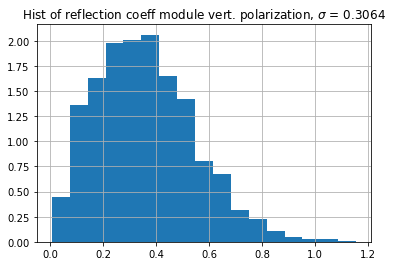

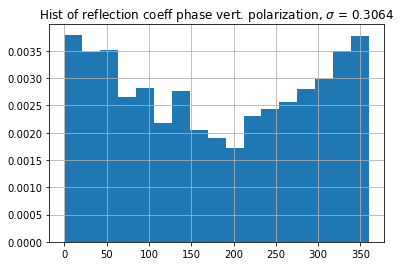

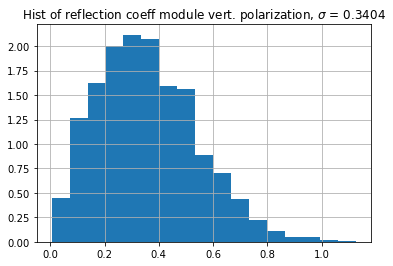

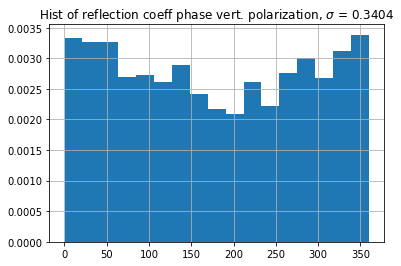

In [32]:
eps1 = 2.3
tanTH1 = 0.0015
eps2 = 55
tanTH2 = 0.54
tetha = 1
tetha = tetha*np.pi/180
lambd = 0.03
epsC1 = complex(eps1,eps1*tanTH1)
epsC2 = complex(eps2,eps2*tanTH2)
sko = np.arange(0.0344,0.35,0.034)
alf = np.around(sko*sin(tetha)/lambd, decimals = 2)
#vertical
G1=sqrt(epsC1)*sqrt(epsC2-epsC1*(cos(tetha))**2 )-epsC2*sin(tetha)
G2=sqrt(epsC1)*sqrt(epsC2-epsC1*(cos(tetha))**2 )+epsC2*sin(tetha)
G = G1/G2
ksi=0.4*(1-np.exp(-276*(alf**2)))
aG=G*np.exp(-8*(np.pi**2)*(alf**2))
xk=np.real(aG)
yk=np.imag(aG)                              
N = 3000
ran = np.random.normal(0,1,(2,N))
for i in range(len(ksi)):
    eps=(ksi[i]/sqrt(2))*(ran)
    epsx=eps[0,:]
    epsy=eps[1,:]                               
    x=xk[i]+epsx
    y=yk[i]+epsy
    Gko=x+1j*y
    Gm=np.abs(Gko)
    phaseG=np.angle(Gko)+2*np.pi
    phaseG=mod(phaseG,2*np.pi)
    #stat for abs
    mx=np.mean(Gm)
    varx=np.var(Gm)
    m3=moment(Gm,3)
    m4=moment(Gm,4)
    #for angle
    mxf=np.mean(phaseG)
    varxf=np.var(phaseG)
    m3f=moment(phaseG,3)
    m4f=moment(phaseG,4)                              
    fig = plt.figure()#abs
    count, bins, ignored = plt.hist(Gm, 17, density=True)
    plt.grid(True)
    plt.title(f'Hist of reflection coeff module vert. polarization, $\sigma$ = {sko[i]:.4f}')
    fig = plt.figure()#phase
    count, bins, ignored = plt.hist(phaseG*180/np.pi, 17, density=True)
    plt.grid(True)
    plt.title(f'Hist of reflection coeff phase vert. polarization, $\sigma$ = {sko[i]:.4f}')

Teory vs Exp

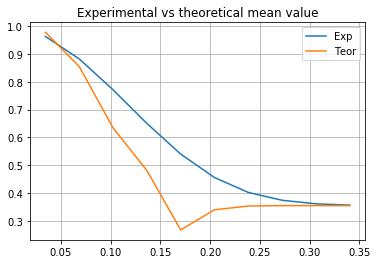

In [35]:
#for horizontal
G1=sqrt(epsC1)*sin(tetha)-sqrt(epsC2-epsC1*(cos(tetha))**2)
G2=sqrt(epsC1)*sin(tetha)+sqrt(epsC2-epsC1*(cos(tetha))**2)
G = abs(G1/G2)
Gk = G*np.exp(-8*np.pi**2*sko**2)
ksi=0.4*(1-np.exp(-276*(sko**2)))
nu = ksi/sqrt(2)
mx_t = zeros(len(Gk))
m2 = zeros(len(Gk))
for i in range(len(Gk)):
    a = Gk[i]**2/(4*(nu[i]**4))
    b = Gk[i]**2/(2*(nu[i]**2))
    mx_t[i] = nu[i]*sqrt(np.pi/2)*((1+b)*mpmath.besseli(0, a)+b*mpmath.besseli(1, a))*mpmath.exp(-a)
    #mx_t[i] = Gk[i]*(1+(nu[i]**2)/((2*Gk[i])**2))
    m2[i] = 2*nu[i]**2 + Gk[i]**2


for i in range(4):
    a = Gk[i]**2/(4*(nu[i]**4))
    b = Gk[i]**2/(2*(nu[i]**2))
  #  #mx_t[i] = nu[i]*sqrt(np.pi/2)*((1+b)*mpmath.besseli(0, a)+b*mpmath.besseli(1, a))*mpmath.exp(-a)
    mx_t[i] += Gk[i]*(1+(nu[i]**2)/((2*Gk[i])**2))
fig = plt.figure()
plt.plot(sko,mxh,label = 'Exp')
plt.plot(sko,mx_t,label = 'Teor')
plt.title('Experimental vs theoretical mean value')
plt.legend(loc='upper right')
plt.grid(True)